In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 다운로드 합니다.
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

/home/givenone/morpheus/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/givenone/morpheus/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/givenone/morpheus/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/givenone/morpheus/venv/lib/python3.6/site-packages/tensorf

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [2]:
learning_rate_RMSProp = 0.02
learning_rate_GradientDescent = 0.5
num_epochs = 100         # 반복횟수
batch_size = 256          
display_step = 1         # 몇 Step마다 log를 출력할지 결정합니다.
input_size = 784         # MNIST 데이터 input (이미지 크기: 28*28)
hidden1_size = 128       # 첫번째 히든레이어의 노드 개수 
hidden2_size = 64        # 두번째 히든레이어의 노드 개수 

In [3]:
x = tf.placeholder(tf.float32, shape=[None, input_size])   # 인풋을 위한 플레이스홀더를 정의합니다.
y = tf.placeholder(tf.float32, shape=[None, 10])           # True MNIST 숫자값


AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [7]:
import tensorflow as tf
tf.__version__

AttributeError: module 'tensorflow' has no attribute '__version__'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 다운로드 합니다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# 이미지들을 float32 데이터 타입으로 변경합니다.
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
# 28*28 형태의 이미지를 784차원으로 flattening 합니다.
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784]) #-1 이 None과 같음.
# [0, 255] 사이의 값을 [0, 1]사이의 값으로 Normalize합니다.
x_train, x_test = x_train / 255., x_test / 255.


In [3]:
learning_rate = 0.02
training_epochs = 50    # 반복횟수
batch_size = 256        # 배치개수
display_step = 1        # 손실함수 출력 주기
examples_to_show = 10   # 보여줄 MNIST Reconstruction 이미지 개수
input_size = 784        # 28*28
hidden1_size = 256 
hidden2_size = 128

In [4]:
# tf.data API를 이용해서 데이터를 섞고 batch 형태로 가져옵니다.
train_data = tf.data.Dataset.from_tensor_slices(x_train)
train_data = train_data.shuffle(60000).batch(batch_size)


In [5]:
train_data

<BatchDataset shapes: (None, 784), types: tf.float32>

In [21]:
class AutoEncoder(object):
  # Autoencoder 모델을 위한 tf.Variable들을 정의합니다.
  def __init__(self):
    # 인코딩(Encoding) - 784 -> 256 -> 128
    self.W1 = tf.Variable(tf.random.normal(shape=[input_size, hidden1_size]))
    self.b1 = tf.Variable(tf.random.normal(shape=[hidden1_size]))
    self.W2 = tf.Variable(tf.random.normal(shape=[hidden1_size, hidden2_size]))
    self.b2 = tf.Variable(tf.random.normal(shape=[hidden2_size]))
    # 디코딩(Decoding) 128 -> 256 -> 784
    self.W3 = tf.Variable(tf.random.normal(shape=[hidden2_size, hidden1_size]))
    self.b3 = tf.Variable(tf.random.normal(shape=[hidden1_size]))
    self.W4 = tf.Variable(tf.random.normal(shape=[hidden1_size, input_size]))
    self.b4 = tf.Variable(tf.random.normal(shape=[input_size]))

  def __call__(self, x):
    H1_output = tf.nn.sigmoid(tf.matmul(x, self.W1) + self.b1)
    H2_output = tf.nn.sigmoid(tf.matmul(H1_output, self.W2) + self.b2)
    H3_output = tf.nn.sigmoid(tf.matmul(H2_output, self.W3) + self.b3)
    reconstructed_x = tf.nn.sigmoid(tf.matmul(H3_output, self.W4) + self.b4)

    return reconstructed_x

In [22]:
@tf.function
def mse_loss(y_pred, y_true):
  return tf.reduce_mean(tf.pow(y_true - y_pred, 2)) # MSE(Mean of Squared Error) 손실함수

# 최적화를 위한 RMSProp 옵티마이저를 정의합니다.
optimizer = tf.optimizers.RMSprop(learning_rate)

# 최적화를 위한 function을 정의합니다.
@tf.function
def train_step(model, x):
  # 타겟데이터는 인풋데이터와 같습니다.
  y_true = x
  with tf.GradientTape() as tape:
    y_pred = model(x)
    loss = mse_loss(y_pred, y_true)
  gradients = tape.gradient(loss, vars(model).values())
  optimizer.apply_gradients(zip(gradients, vars(model).values()))

In [23]:
# Autoencoder 모델을 선언합니다.
AutoEncoder_model = AutoEncoder()
print(AutoEncoder_model)

In [24]:
# 지정된 횟수만큼 최적화를 수행합니다.
for epoch in range(training_epochs):
  # 모든 배치들에 대해서 최적화를 수행합니다.
  # Autoencoder는 Unsupervised Learning이므로 타겟 레이블(label) y가 필요하지 않습니다.
  for batch_x in train_data:
    # 옵티마이저를 실행해서 파라마터들을 업데이트합니다.
    _, current_loss = train_step(AutoEncoder_model, batch_x), mse_loss(AutoEncoder_model(batch_x), batch_x)
  # 지정된 epoch마다 학습결과를 출력합니다.
  if epoch % display_step == 0:
    print("반복(Epoch): %d, 손실 함수(Loss): %f" % ((epoch+1), current_loss))

반복(Epoch): 1, 손실 함수(Loss): 0.062491
반복(Epoch): 2, 손실 함수(Loss): 0.051753
반복(Epoch): 3, 손실 함수(Loss): 0.049540
반복(Epoch): 4, 손실 함수(Loss): 0.040989
반복(Epoch): 5, 손실 함수(Loss): 0.036644
반복(Epoch): 6, 손실 함수(Loss): 0.037334
반복(Epoch): 7, 손실 함수(Loss): 0.036369
반복(Epoch): 8, 손실 함수(Loss): 0.036626
반복(Epoch): 9, 손실 함수(Loss): 0.035895
반복(Epoch): 10, 손실 함수(Loss): 0.032516
반복(Epoch): 11, 손실 함수(Loss): 0.034403
반복(Epoch): 12, 손실 함수(Loss): 0.031236
반복(Epoch): 13, 손실 함수(Loss): 0.032125
반복(Epoch): 14, 손실 함수(Loss): 0.031651
반복(Epoch): 15, 손실 함수(Loss): 0.033587
반복(Epoch): 16, 손실 함수(Loss): 0.029577
반복(Epoch): 17, 손실 함수(Loss): 0.029367
반복(Epoch): 18, 손실 함수(Loss): 0.032236
반복(Epoch): 19, 손실 함수(Loss): 0.029614
반복(Epoch): 20, 손실 함수(Loss): 0.030271
반복(Epoch): 21, 손실 함수(Loss): 0.031797
반복(Epoch): 22, 손실 함수(Loss): 0.031008
반복(Epoch): 23, 손실 함수(Loss): 0.032260
반복(Epoch): 24, 손실 함수(Loss): 0.030107
반복(Epoch): 25, 손실 함수(Loss): 0.028411
반복(Epoch): 26, 손실 함수(Loss): 0.028466
반복(Epoch): 27, 손실 함수(Loss): 0.029251
반복(Epoch):

In [25]:
# 테스트 데이터로 Reconstruction을 수행합니다.
reconstructed_result = AutoEncoder_model(x_test[:examples_to_show])


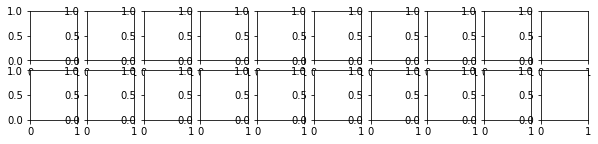

In [28]:
f, a = plt.subplots(2, 10, figsize=(10, 2))

/home/givenone/morpheus/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


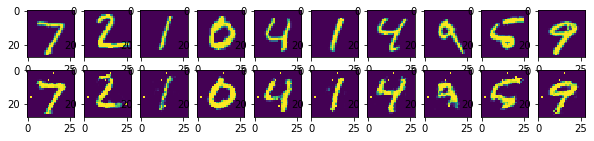

In [30]:
reconstructed_result = AutoEncoder_model(x_test[:examples_to_show])
# 원본 MNIST 데이터와 Reconstruction 결과를 비교합니다.
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
  a[0][i].imshow(np.reshape(x_test[i], (28, 28)))
  a[1][i].imshow(np.reshape(reconstructed_result[i], (28, 28)))
#f.savefig('reconstructed_mnist_image.png')  # reconstruction 결과를 png로 저장합니다.
f.show()
plt.draw()


In [27]:
%matplotlib inline

In [35]:
import tensorflow as tf

# MNIST 데이터를 다운로드 합니다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# 이미지들을 float32 데이터 타입으로 변경합니다.
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
# 28*28 형태의 이미지를 784차원으로 flattening 합니다.
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
# [0, 255] 사이의 값을 [0, 1]사이의 값으로 Normalize합니다.
x_train, x_test = x_train / 255., x_test / 255.

# 학습에 필요한 설정값들을 정의합니다.
learning_rate_RMSProp = 0.02
learning_rate_GradientDescent = 0.5
num_epochs = 100         # 반복횟수
batch_size = 256
display_step = 1         # 몇 Step마다 log를 출력할지 결정합니다.
input_size = 784         # MNIST 데이터 input (이미지 크기: 28*28)
hidden1_size = 128       # 첫번째 히든레이어의 노드 개수 
hidden2_size = 64        # 두번째 히든레이어의 노드 개수 

# tf.data API를 이용해서 데이터를 섞고 batch 형태로 가져옵니다.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size)

In [36]:
def random_normal_intializer_with_stddev_1():
  return tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=None)

In [37]:
class AutoEncoder(tf.keras.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    # 인코딩(Encoding) - 784 -> 128 -> 64
    self.hidden_layer_1 = tf.keras.layers.Dense(hidden1_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())
    self.hidden_layer_2 = tf.keras.layers.Dense(hidden2_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())
    # 디코딩(Decoding) 64 -> 128 -> 784
    self.hidden_layer_3 = tf.keras.layers.Dense(hidden1_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())
    self.output_layer = tf.keras.layers.Dense(input_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())


In [38]:
class AutoEncoder(tf.keras.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    # 인코딩(Encoding) - 784 -> 128 -> 64
    self.hidden_layer_1 = tf.keras.layers.Dense(hidden1_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())
    self.hidden_layer_2 = tf.keras.layers.Dense(hidden2_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())
    # 디코딩(Decoding) 64 -> 128 -> 784
    self.hidden_layer_3 = tf.keras.layers.Dense(hidden1_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())
    self.output_layer = tf.keras.layers.Dense(input_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())

  def call(self, x):
    H1_output = self.hidden_layer_1(x)
    H2_output = self.hidden_layer_2(H1_output)
    H3_output = self.hidden_layer_3(H2_output)
    X_reconstructed = self.output_layer(H3_output)

    return X_reconstructed, H2_output


In [39]:
# tf.keras.Model을 이용해서 Softmax 분류기를 정의합니다.
class SoftmaxClassifier(tf.keras.Model):
  def __init__(self):
    super(SoftmaxClassifier, self).__init__()
    # 원본 MNIST 이미지(784) 대신 오토인코더의 압축된 특징(64)을 입력값으로 받습니다.
    self.softmax_layer = tf.keras.layers.Dense(10,
                                               activation='softmax',
                                               kernel_initializer='zeros',
                                               bias_initializer='zeros')

  def call(self, x):
    y_pred = self.softmax_layer(x)

    return y_pred

In [40]:
@tf.function
def pretraining_mse_loss(y_pred, y_true):
  return tf.reduce_mean(tf.pow(y_true - y_pred, 2)) # MSE(Mean of Squared Error) 손실함수

@tf.function
def finetuning_cross_entropy_loss(y_pred_softmax, y):
  return tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_pred_softmax), axis=[1]))     # cross-entropy loss 함수


In [41]:
#Pre- Training
pretraining_optimizer = tf.optimizers.RMSprop(learning_rate_RMSProp, epsilon=1e-10)
@tf.function
def pretraining_train_step(autoencoder_model, x):
  # 타겟데이터는 인풋데이터와 같습니다.
  y_true = x
  with tf.GradientTape() as tape:
    y_pred, _ = autoencoder_model(x)
    pretraining_loss = pretraining_mse_loss(y_pred, y_true)
  gradients = tape.gradient(pretraining_loss, autoencoder_model.trainable_variables)
  pretraining_optimizer.apply_gradients(zip(gradients, autoencoder_model.trainable_variables))

In [43]:
finetuning_optimizer = tf.optimizers.SGD(learning_rate_GradientDescent)
@tf.function
def finetuning_train_step(autoencoder_model, softmax_classifier_model, x, y):
  with tf.GradientTape() as tape:
    y_pred, extracted_features = autoencoder_model(x)
    y_pred_softmax = softmax_classifier_model(extracted_features)
    finetuning_loss = finetuning_cross_entropy_loss(y_pred_softmax, y)
  autoencoder_encoding_variables = autoencoder_model.hidden_layer_1.trainable_variables + autoencoder_model.hidden_layer_2.trainable_variables
  gradients = tape.gradient(finetuning_loss, autoencoder_encoding_variables + softmax_classifier_model.trainable_variables)
  finetuning_optimizer.apply_gradients(zip(gradients, autoencoder_encoding_variables + softmax_classifier_model.trainable_variables))

In [45]:
@tf.function
def compute_accuracy(y_pred_softmax, y):
  correct_prediction = tf.equal(tf.argmax(y_pred_softmax,1), tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  return accuracy


In [46]:
# Autoencoder 모델을 선언합니다.
AutoEncoder_model = AutoEncoder()
# Softmax 분류기 모델을 선언합니다. (입력으로 Autoencoder의 압축된 특징을 넣습니다.)
SoftmaxClassifier_model = SoftmaxClassifier()

In [47]:
for epoch in range(num_epochs):
  # 모든 배치들에 대해서 최적화를 수행합니다.
  for batch_x, _ in train_data:
    _, pretraining_loss_print = pretraining_train_step(AutoEncoder_model, batch_x), pretraining_mse_loss(AutoEncoder_model(batch_x)[0], batch_x)
  # 지정된 epoch마다 학습결과를 출력합니다.
  if epoch % display_step == 0:
    print("반복(Epoch): %d, Pre-Training 손실 함수(pretraining_loss): %f" % ((epoch + 1), pretraining_loss_print))
print("Step 1 : MNIST 데이터 재구축을 위한 오토인코더 최적화 완료(Pre-Training)")

반복(Epoch): 1, Pre-Training 손실 함수(pretraining_loss): 0.054252
반복(Epoch): 2, Pre-Training 손실 함수(pretraining_loss): 0.039407
반복(Epoch): 3, Pre-Training 손실 함수(pretraining_loss): 0.034838
반복(Epoch): 4, Pre-Training 손실 함수(pretraining_loss): 0.031940
반복(Epoch): 5, Pre-Training 손실 함수(pretraining_loss): 0.031021
반복(Epoch): 6, Pre-Training 손실 함수(pretraining_loss): 0.036528
반복(Epoch): 7, Pre-Training 손실 함수(pretraining_loss): 0.028920
반복(Epoch): 8, Pre-Training 손실 함수(pretraining_loss): 0.031571
반복(Epoch): 9, Pre-Training 손실 함수(pretraining_loss): 0.027775
반복(Epoch): 10, Pre-Training 손실 함수(pretraining_loss): 0.023759
반복(Epoch): 11, Pre-Training 손실 함수(pretraining_loss): 0.028270
반복(Epoch): 12, Pre-Training 손실 함수(pretraining_loss): 0.026073
반복(Epoch): 13, Pre-Training 손실 함수(pretraining_loss): 0.026678
반복(Epoch): 14, Pre-Training 손실 함수(pretraining_loss): 0.023894
반복(Epoch): 15, Pre-Training 손실 함수(pretraining_loss): 0.026423
반복(Epoch): 16, Pre-Training 손실 함수(pretraining_loss): 0.024048
반복(Epoch): 17, Pr

In [57]:
len(AutoEncoder_model.hidden_layer_2.trainable_variables + AutoEncoder_model.hidden_layer_1.trainable_variables)

4

In [58]:
for epoch in range(num_epochs + 100):
  # 모든 배치들에 대해서 최적화를 수행합니다.
  for batch_x, batch_y in train_data:
    batch_y = tf.one_hot(batch_y, depth=10)
    _, finetuning_loss_print = finetuning_train_step(AutoEncoder_model, SoftmaxClassifier_model, batch_x, batch_y), finetuning_cross_entropy_loss(SoftmaxClassifier_model(AutoEncoder_model(batch_x)[1]), batch_y)
  # 지정된 epoch마다 학습결과를 출력합니다.
  if epoch % display_step == 0:
    print("반복(Epoch): %d, Fine-tuning 손실 함수(finetuning_loss): %f" % ((epoch + 1), finetuning_loss_print))
print("Step 2 : MNIST 데이터 분류를 위한 오토인코더+Softmax 분류기 최적화 완료(Fine-Tuning)")

# 오토인코더+Softmax 분류기 모델의 정확도를 출력합니다.
print("정확도(오토인코더+Softmax 분류기): %f" % compute_accuracy(SoftmaxClassifier_model(AutoEncoder_model(x_test)[1]), tf.one_hot(y_test, depth=10)))  # 정확도 : 약 96%


반복(Epoch): 1, Fine-tuning 손실 함수(finetuning_loss): 0.512844
반복(Epoch): 2, Fine-tuning 손실 함수(finetuning_loss): 0.321322
반복(Epoch): 3, Fine-tuning 손실 함수(finetuning_loss): 0.482537
반복(Epoch): 4, Fine-tuning 손실 함수(finetuning_loss): 0.280574
반복(Epoch): 5, Fine-tuning 손실 함수(finetuning_loss): 0.145813
반복(Epoch): 6, Fine-tuning 손실 함수(finetuning_loss): 0.157173
반복(Epoch): 7, Fine-tuning 손실 함수(finetuning_loss): 0.134000
반복(Epoch): 8, Fine-tuning 손실 함수(finetuning_loss): 0.255357
반복(Epoch): 9, Fine-tuning 손실 함수(finetuning_loss): 0.185198
반복(Epoch): 10, Fine-tuning 손실 함수(finetuning_loss): 0.091456
반복(Epoch): 11, Fine-tuning 손실 함수(finetuning_loss): 0.076445
반복(Epoch): 12, Fine-tuning 손실 함수(finetuning_loss): 0.171736
반복(Epoch): 13, Fine-tuning 손실 함수(finetuning_loss): 0.187210
반복(Epoch): 14, Fine-tuning 손실 함수(finetuning_loss): 0.162905
반복(Epoch): 15, Fine-tuning 손실 함수(finetuning_loss): 0.103447
반복(Epoch): 16, Fine-tuning 손실 함수(finetuning_loss): 0.122351
반복(Epoch): 17, Fine-tuning 손실 함수(finetuning_loss)

반복(Epoch): 138, Fine-tuning 손실 함수(finetuning_loss): 0.012012
반복(Epoch): 139, Fine-tuning 손실 함수(finetuning_loss): 0.007042
반복(Epoch): 140, Fine-tuning 손실 함수(finetuning_loss): 0.023430
반복(Epoch): 141, Fine-tuning 손실 함수(finetuning_loss): 0.022693
반복(Epoch): 142, Fine-tuning 손실 함수(finetuning_loss): 0.010108
반복(Epoch): 143, Fine-tuning 손실 함수(finetuning_loss): 0.011053
반복(Epoch): 144, Fine-tuning 손실 함수(finetuning_loss): 0.064638
반복(Epoch): 145, Fine-tuning 손실 함수(finetuning_loss): 0.024859
반복(Epoch): 146, Fine-tuning 손실 함수(finetuning_loss): 0.016001
반복(Epoch): 147, Fine-tuning 손실 함수(finetuning_loss): 0.013062
반복(Epoch): 148, Fine-tuning 손실 함수(finetuning_loss): 0.009952
반복(Epoch): 149, Fine-tuning 손실 함수(finetuning_loss): 0.013058
반복(Epoch): 150, Fine-tuning 손실 함수(finetuning_loss): 0.012180
반복(Epoch): 151, Fine-tuning 손실 함수(finetuning_loss): 0.031376
반복(Epoch): 152, Fine-tuning 손실 함수(finetuning_loss): 0.016952
반복(Epoch): 153, Fine-tuning 손실 함수(finetuning_loss): 0.013530
반복(Epoch): 154, Fine-tun